# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [12]:
import csv

with open("data.csv", encoding="utf-8") as rFile:
    reader = csv.reader(rFile, delimiter=',')
    with open("data_fixed.csv", mode='w', encoding="utf-8") as wFile:
        writer = csv.writer(wFile, delimiter=',', lineterminator="\r")
        writer.writerow(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'nursery', 'plans_university', 'past_failures'])
        fl = 0
        for row in reader:
            if fl == 0:
                fl = 1
                continue
            if (int(row[0]) > 100):
                row[0] = str(2016 - int(row[0]))
            last = row[-1]
            row[-1] = last[:len(last) - 1]
            row.append(last[len(last) - 1])
            writer.writerow(row)

### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

__(+1 балл)__

Дополнительно сравните качество замены на среднее по столбцу и на медиану по столбцу


*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [71]:
import pandas as pd

pd.options.mode.chained_assignment = None 

df = pd.read_csv("data_fixed.csv", delimiter=',')

for col in df:
    df[col][df[col].isnull()] = df[col].mean()

df.to_csv("data_fixed2.csv", index=False)

# Чето не получается сравнивать без модельки
        

In [72]:
import pandas as pd

pd.options.mode.chained_assignment = None 

df = pd.read_csv("data_fixed.csv", delimiter=',')

for col in df:
    df[col][df[col].isnull()] = df[col].median()

df.to_csv("data_fixed2.csv", index=False)

# Чето не получается сравнивать без модельки

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [158]:
import pandas as pd
import numpy as np

df = pd.read_csv("data_fixed2.csv")

for col in df:
    df[col] /= max(abs(df[col]))

print(df)
df.to_csv("data_fixed3.csv", index=False)



          age  Medu  Fedu  traveltime  studytime  famrel  freetime  goout  \
0    0.551724  1.00  1.00        0.02       0.50     1.0       0.8    0.8   
1    0.586207  1.00  1.00        0.02       0.25     1.0       0.6    0.8   
2    0.551724  0.25  0.25        0.04       0.25     0.8       1.0    1.0   
3    0.620690  0.25  0.50        0.04       0.25     0.6       0.8    0.8   
4    0.586207  0.50  0.25        0.04       0.50     0.8       0.4    1.0   
..        ...   ...   ...         ...        ...     ...       ...    ...   
644  0.620690  0.50  0.50        0.08       0.50     0.8       0.4    1.0   
645  0.517241  1.00  1.00        0.04       0.50     0.8       0.6    0.2   
646  0.724138  0.25  0.25        0.04       0.50     1.0       0.6    0.6   
647  0.551724  0.50  0.50        0.02       0.25     0.8       0.6    0.8   
648  0.551724  0.50  0.75        0.80       0.50     0.8       1.0    0.8   

     Dalc  Walc  health  sex_M  address_U  famsize_LE3  Pstatus_T  nursery 

### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [188]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

data = pd.read_csv("data_fixed3.csv")
ans = pd.read_csv("scores.csv")

data = data.sample(frac=1).reset_index(drop=True)
model = LinearRegression()
scores = cross_validate(model, data, ans, cv=10, scoring=("r2", "max_error"), return_train_score=True)
print(sqrt(scores["train_r2"].mean()))
print(scores["train_max_error"].mean())

# В целом работает неплохо, но видимо когда оценка у чела 0, ошибается

0.1916419790882873
-61.52519606435809


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Попробуйте несколько способов добавления полных данных

In [232]:
import pandas as pd
import numpy as np

data = pd.read_csv("data_fixed2.csv")

school_sup = np.array([0] * 649)

with open("school_support.txt", "r", encoding="utf-8") as sch_sup_file:
    inds = [int(i) - 1 for i in sch_sup_file.readlines()]
    school_sup[inds] = 1
data["school_support"] = school_sup

attendance = pd.read_csv("attendance.csv", sep=';')
attendance_new = []
for i, row in attendance.iterrows():
    attendance_new.append(32 - len(row[row == '+']))
attendance_new = np.array(attendance_new)

In [289]:
data["attendance"] = attendance_new / 32 # работает лучше всего

In [239]:
data["attendance"] = attendance_new

In [241]:
data["attendance"] = 32 - attendance_new

In [274]:
data["attendance"] = (32 - attendance_new) / 32 # эта штука тоже неплохо на самом деле

In [288]:
data = data.sample(frac=1).reset_index(drop=True)
model = LinearRegression()
scores = cross_validate(model, data, ans, cv=10, scoring=("r2", "max_error"), return_train_score=True)
print(sqrt(scores["train_r2"].mean()))
print(scores["train_max_error"].mean())

0.22516709200964238
-62.5811639119994


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

0       1
1       1
2       2
3       2
4       2
       ..
644     4
645     2
646     2
647     1
648    40
Name: traveltime, Length: 649, dtype: int64


<Axes: >

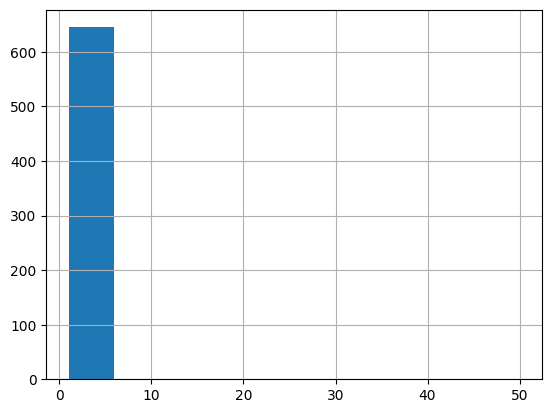

In [293]:
import pandas as pd
import numpy as np

data = pd.read_csv("data_fixed4.csv")
# data.hist()
print(data["traveltime"])
data["traveltime"].hist()



In [298]:
data = pd.read_csv("data_fixed4.csv")

data["age"][data["age"] > 18] = data["age"][data["age"] <= 18].mean()
# data["traveltime"][4 < data["traveltime"] < 15] = 1
# data["traveltime"][15 <= data["traveltime"] < 30] = 2
# data["traveltime"][30 <= data["traveltime"] < 60] = 3
# data["traveltime"][60 <= data["traveltime"]] = 4

for i in range(len(data['traveltime'])):
    if data['traveltime'][i] > 4:
        if data['traveltime'][i] < 15:
            data['traveltime'][i] = 1
        elif data['traveltime'][i] < 30:
            data['traveltime'][i] = 2
        elif data['traveltime'][i] < 60:
            data['traveltime'][i] = 3
        else:
            data['traveltime'][i] = 4

data.to_csv("data_fixed5.csv", index=False)


C:\Users\ohmei\AppData\Local\Temp\ipykernel_9016\964442674.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '16.565217391304348' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data["age"][data["age"] > 18] = data["age"][data["age"] <= 18].mean()


__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказаниепосчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

In [304]:
import sklearn
from sklearn import linear_model

for col in data:
    data[col] /= max(abs(data[col]))

regression = linear_model.LinearRegression().fit(data, ans) #create model and train it

errors = []

for i in range(649):
    x = [data.iloc[i]]
    y = ans["score"][0]
    prediction = model.predict(x);

    error = (prediction - y)**2 
    errors.append((error, prediction, y, i))

errors = sorted(errors)[::-1]
for error, pred_y, y, ind in errors:
    print(error, pred_y, y, ind, data.iloc[i])





In [1]:
# Your code here
# ...

### Финальное предсказание и отчёт

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [ ]:
# Your code here
# ...